In [25]:
import numpy as np
import typing as ty
import pandas as pd

In [26]:
df = pd.read_excel("data.xlsx")
df

,年份,国内生产总值,第一产业,第二产业,第三产业
0,2000,1988,386,839,763
1,2001,2061,408,846,808
2,2002,2335,422,960,953
3,2003,2750,482,1258,1010
4,2004,3356,511,1577,1268
5,2005,3806,561,1893,1352


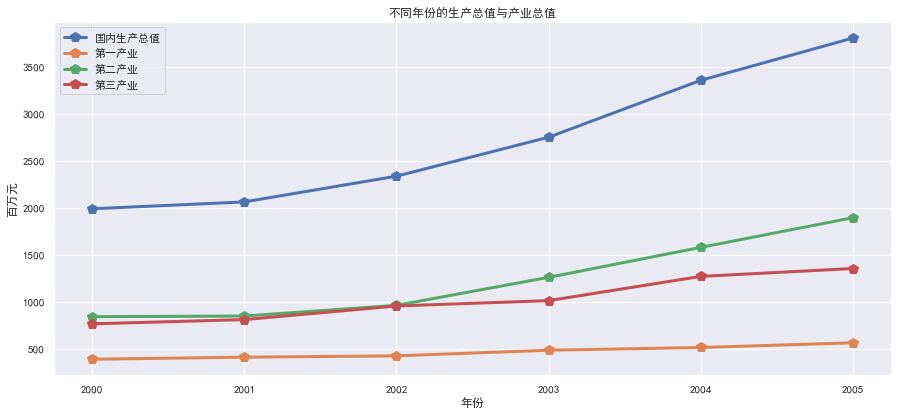

In [27]:
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import rcParams
%matplotlib inline
sns.set_theme(style="darkgrid")
# 设定整个画布的尺寸
fig = plt.figure(figsize=(15,6.5))
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置x轴刻度间隔
# x_major_locator=MultipleLocator(25)
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel("年份")
plt.ylabel("百万元")
plt.title("不同年份的生产总值与产业总值")
#绘图数据
x,y,y1,y2,y3 = df['年份'],df['国内生产总值'],df['第一产业'],df['第二产业'],df['第三产业']
plt.plot(x,y,'-p',label="国内生产总值",linewidth=3,markersize=10)
plt.plot(x,y1,'-p',label="第一产业",linewidth=3,markersize=10)
plt.plot(x,y2,'-p',label="第二产业",linewidth=3,markersize=10)
plt.plot(x,y3,'-p',label="第三产业",linewidth=3,markersize=10)
plt.legend()
# plt.savefig("1.eps",format = 'eps')

In [28]:
#预处理
df['国内生产总值'] /= df['国内生产总值'].mean()
df['第一产业'] /= df['第一产业'].mean()
df['第二产业'] /= df['第二产业'].mean()
df['第三产业'] /= df['第三产业'].mean()
df

,年份,国内生产总值,第一产业,第二产业,第三产业
0,2000,0.731959,0.836101,0.682761,0.743906
1,2001,0.758837,0.883755,0.688458,0.787780
2,2002,0.859720,0.914079,0.781229,0.929152
3,2003,1.012518,1.044043,1.023735,0.984725
4,2004,1.235641,1.106859,1.283331,1.236269
5,2005,1.401325,1.215162,1.540486,1.318167


In [29]:
#计算各个指标与母序列的关联系数
df['第一产业'] = (df['国内生产总值'] - df['第一产业']).abs()
df['第二产业'] = (df['国内生产总值'] - df['第二产业']).abs()
df['第三产业'] = (df['国内生产总值'] - df['第三产业']).abs()

In [35]:
a = min(df['第一产业'].min(),df['第二产业'].min(),df['第三产业'].min())
b = max(df['第一产业'].max(),df['第二产业'].max(),df['第三产业'].max())
print(a,b)

0.0006284452608860125 0.18616302377142002


In [37]:
p = 0.5#分辨系数
df['第一产业'] = (a+p*b)/(df['第一产业']+p*b)
df['第二产业'] = (a+p*b)/(df['第二产业']+p*b)
df['第三产业'] = (a+p*b)/(df['第三产业']+p*b)
df

,年份,国内生产总值,第一产业,第二产业,第三产业
0,2000,0.731959,0.475145,0.658636,0.892228
1,2001,0.758837,0.429863,0.573289,0.767955
2,2002,0.859720,0.635577,0.546182,0.576630
3,2003,1.012518,0.752048,0.898480,0.775266
4,2004,1.235641,0.422378,0.665686,1.000000
5,2005,1.401325,0.335584,0.403502,0.531718


In [41]:
coef1 = df['第一产业'].sum()/df.shape[0]
coef2 = df['第二产业'].sum()/df.shape[0]
coef3 = df['第三产业'].sum()/df.shape[0]
coef1,coef2,coef3

(0.5084324125959353, 0.624295833506042, 0.7572996249999101)